### Student Information
Name: 黃詠家 (Yung-Chia Huang)

Student ID: 112061520

GitHub ID: 102374298

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

---

## 1. Upload the Data
Since the .csv file is open using pandas libary, we don't have to do data transform to pandas dataframe.

In [3]:
### Begin Assignment Here
import pandas as pd

df = pd.read_csv("Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")

In [32]:
## This cell is used for getting familiar with the data

df.head()
# df.tail()
df[0:2]
# df[0:2][['comment', 'sentiment']]
# df['sentiment'].value_counts()

,sentiment,comment
0,not nostalgia,He was a singer with a golden voice that I lov...
1,nostalgia,The mist beautiful voice ever I listened to hi...


In [8]:
## This cell is used for getting familiar with the data

# 1. How many rows and columns are in the dataset?
rows, columns = df.shape
print(f"1. There are {rows} rows and {columns} columns in the dataset.")

# 2. What are the column names?
print(f"2. The column names are {', '.join(df.columns)}.")

# 3. What are the data types of each column?
print("3. The data types of each column are:")
print(df.dtypes)

# 4. Are there any missing values?
missing_values = df.isnull().sum().sum()
if missing_values == 0:
    print("4. There are no missing values.")
else:
    print(f"4. There are {missing_values} missing values.")

# 5. How many unique values are in each column?
print("5. The number of unique values in each column are:")
print(df.nunique())

1. There are 1500 rows and 2 columns in the dataset.
2. The column names are sentiment, comment.
3. The data types of each column are:
sentiment    object
comment      object
dtype: object
4. There are no missing values.
5. The number of unique values in each column are:
sentiment       2
comment      1499
dtype: int64


---

## 2. Data Mining using Pandas

In [1]:
import helpers.data_mining_helpers as dmh

### 2.1 Dealing with missing value

In [5]:
# check missing values
df.isnull()

,sentiment,comment
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
1495,False,False
1496,False,False
1497,False,False
1498,False,False


In [4]:
# Check if the dataset contain missing values using the function check_missing_values
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentiment,comment
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


In [7]:
# axis=1 checks for missing values in rows
df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
1495    (The amoung of missing records is: , 0)
1496    (The amoung of missing records is: , 0)
1497    (The amoung of missing records is: , 0)
1498    (The amoung of missing records is: , 0)
1499    (The amoung of missing records is: , 0)
Length: 1500, dtype: object

---
#### 2.1.1
Adding dummy series in current dataframe, and then delete the dummy series. To make sure that the function for finding missing value is reliable.

In [14]:
dummy_series = pd.Series(["dummy_record"], index=["sentiment"])
dummy_series

# Convert Series to DataFrame
dummy_series.to_frame().T

# Concatenate the DataFrames
result_with_series = pd.concat([df, dummy_series.to_frame().T], ignore_index=True)

# check if the records was commited into result
print('The length of origin data:',len(df))
print('The length with dummy series:',len(result_with_series))

The length of origin data: 1500
The length with dummy series: 1501


In [15]:
# try the function and see if it can detect that there is a missing value on the resulting dataframe.
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentiment,comment
0,The amoung of missing records is:,The amoung of missing records is:
1,0,1


In [18]:
# insert the dummy series into the origin dataframe
df = pd.concat([df, dummy_series.to_frame().T], ignore_index=True)

print('The length of origin data:',len(df))

df.isnull().apply(lambda x: dmh.check_missing_values(x))

The length of origin data: 1501


,sentiment,comment
0,The amoung of missing records is:,The amoung of missing records is:
1,0,1


In [20]:
# Remove missing values
df.dropna(inplace=True)

# check if the missing values were removed
print('The length of origin data:',len(df))
df.isnull().apply(lambda x: dmh.check_missing_values(x))

The length of origin data: 1500


,sentiment,comment
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


---
### 2.2 Dealing with duplicate data

In [24]:
# df.duplicated()
sum(df.duplicated())

1

Since the sum of duplicate result in 1, let's select `comment` columns instead of checking by all columns.

In [25]:
sum(df.duplicated('comment'))

1

In [29]:
# Find the two duplicated records
df[df.duplicated('comment',keep=False)]

,sentiment,comment
62,not nostalgia,never heard this song before... WOW What an am...
78,not nostalgia,never heard this song before... WOW What an am...


Since we already got a duplicate records, we don't have to create a dummy duplicate series and get rid of it. We just drop the duplicate record. Be aware of that we only need to delete one record, not all the record. Therefore, `keep` is set to True, so is `inplace` (changes directly on the dataframe). The default of `keep` in `drop_duplicate` is *first*, which means to keep the first duplicate and drop all the others.

In [39]:
df.drop_duplicates(inplace=True)
print('The length of origin data:',len(df))
print('The shape of the data:',df.shape)
df[62:63]

The length of origin data: 1499
The shape of the data: (1499, 2)


,sentiment,comment
62,not nostalgia,never heard this song before... WOW What an am...


---

## 3. Data Preprocessing
With section as follow:
- 3.1 Sampling
- 3.2 Feature Creation
- 3.3 Feature Subset Selection
- 3.4 Attribute transformation / Aggregation
- 3.5 Dimensionality Reduction
- 3.6 Discretization and Binarization

---
### 3.1 Sampling

In [42]:
df_sample = df.sample(n=500)
# check the length of the sample
print(len(df_sample))
# check the shape of the sample
df_sample[0:2]

500


,sentiment,comment
449,nostalgia,Wow its amazing how young I was when this was ...
914,not nostalgia,EXCELLENT percussion and horns-----I have hear...


Let's visualize and analyze the disparity between the two datasets by using `matplotlib` python library. We can see that the distribution between two datasets are similar.

In [43]:
import matplotlib.pyplot as plt
# need this line to display the plot in jupyter notebook
%matplotlib inline

In [47]:
# find the unique values of the sentiment column
sentiment = df.sentiment.unique()
print(sentiment)

['not nostalgia' 'nostalgia']


upper bound: 800
---------------------------------
sentiment
nostalgia        750
not nostalgia    749
Name: count, dtype: int64
---------------------------------
sentiment
not nostalgia    253
nostalgia        247
Name: count, dtype: int64


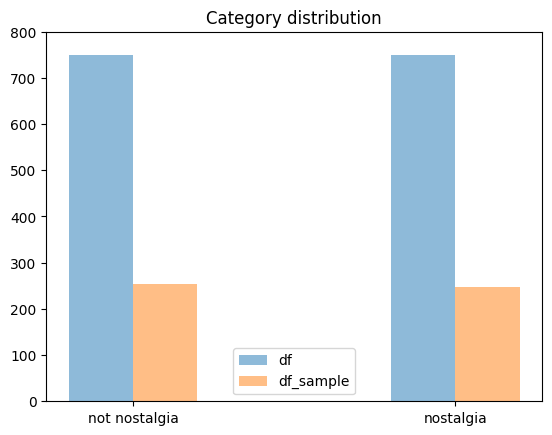

In [53]:
# The upper bound is for the plotting
upper_bound = max(df.sentiment.value_counts()) + 50
print('upper bound:',upper_bound)
print('---------------------------------')
print(df.sentiment.value_counts())
print('---------------------------------')
print(df_sample.sentiment.value_counts())

# set the starting of x axis
width = 0.2
# let df shift left with width/2 for each sentiment
X_xaxis = [x-(width/2) for x in range(len(sentiment))]
# let df_sample shift right with width/2 for each category
X_sample_xaxis = [x+(width/2) for x in range(len(sentiment))]

X_yaxis = df.sentiment.value_counts()
X_sample_yaxis = df_sample.sentiment.value_counts()

# sort the sentiment of X_yaxis and X_sample_yaxis
X_yaxis = X_yaxis[sentiment]
X_sample_yaxis = X_sample_yaxis[sentiment]

# plot barchart for df and df_sample
# plot in the order of sentiment

plt.bar(X_xaxis, X_yaxis,
        width, label = 'df', alpha = 0.5)
plt.bar(X_sample_xaxis, X_sample_yaxis,
        width, label = 'df_sample', alpha = 0.5)
plt.legend()
plt.title('Category distribution')
plt.xticks(range(len(sentiment)), sentiment, rotation = 0)
plt.ylim([0, upper_bound])
plt.show()

---
### 3.2 Feature Creation
Create some feature from `comment`.\
Obtain the **Unigrams** from each comment, and append it to the dataframe.

In [54]:
import nltk

In [57]:
df['unigrams'] = df['comment'].apply(lambda x: dmh.tokenize_text(x))
df[0:4]["unigrams"]

0    [He, was, a, singer, with, a, golden, voice, t...
1    [The, mist, beautiful, voice, ever, I, listene...
2    [I, have, most, of, Mr., Reeves, songs, ., Alw...
3    [30, day, leave, from, 1st, tour, in, Viet, Na...
Name: unigrams, dtype: object

In [58]:
df[0:4]

,sentiment,comment,unigrams
0,not nostalgia,He was a singer with a golden voice that I lov...,"[He, was, a, singer, with, a, golden, voice, t..."
1,nostalgia,The mist beautiful voice ever I listened to hi...,"[The, mist, beautiful, voice, ever, I, listene..."
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,"[I, have, most, of, Mr., Reeves, songs, ., Alw..."
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,"[30, day, leave, from, 1st, tour, in, Viet, Na..."


In [60]:
list(df[0:1]['unigrams'])

[['He',
  'was',
  'a',
  'singer',
  'with',
  'a',
  'golden',
  'voice',
  'that',
  'I',
  'love',
  'to',
  'hear',
  'all',
  'the',
  'time',
  '.',
  'I',
  'was',
  'his',
  'great',
  'fan',
  'at',
  'the',
  'age',
  'of',
  '16years',
  'in',
  'those',
  'days',
  'and',
  'still',
  'now',
  '.',
  'Although',
  'we',
  'have',
  'many',
  'singers',
  'now',
  ',',
  'but',
  ',',
  'I',
  'can',
  'vouch',
  'for',
  'Jim',
  'Reeves',
  'all',
  'the',
  'time',
  '.',
  'You',
  'feel',
  'relaxed',
  ',',
  'emotional',
  'and',
  'loving',
  '.',
  'Thank',
  'you',
  'Lord',
  'for',
  'his',
  'life',
  '.']]

---
### 3.3 Feature Subset Selection
Generate a document-term matrix from the original dataset by using scikit learn built in functionalities. Choosing the `fit_transform` for the `CountVectorizer` is that it efficiently learns the vocabulary dictionary and returns a term-document matrix.

In [61]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.comment)
print(df_counts[0])

  (np.int32(0), np.int32(1598))	1
  (np.int32(0), np.int32(3570))	2
  (np.int32(0), np.int32(2973))	1
  (np.int32(0), np.int32(3650))	1
  (np.int32(0), np.int32(1470))	1
  (np.int32(0), np.int32(3534))	1
  (np.int32(0), np.int32(3282))	1
  (np.int32(0), np.int32(2028))	1
  (np.int32(0), np.int32(3336))	1
  (np.int32(0), np.int32(1606))	1
  (np.int32(0), np.int32(233))	2
  (np.int32(0), np.int32(3284))	3
  (np.int32(0), np.int32(3328))	2
  (np.int32(0), np.int32(1651))	2
  (np.int32(0), np.int32(1512))	1
  (np.int32(0), np.int32(1249))	1
  (np.int32(0), np.int32(323))	1
  (np.int32(0), np.int32(214))	1
  (np.int32(0), np.int32(2341))	1
  (np.int32(0), np.int32(15))	1
  (np.int32(0), np.int32(1733))	1
  (np.int32(0), np.int32(3304))	1
  (np.int32(0), np.int32(907))	1
  (np.int32(0), np.int32(258))	2
  (np.int32(0), np.int32(3124))	1
  (np.int32(0), np.int32(2328))	2
  (np.int32(0), np.int32(245))	1
  (np.int32(0), np.int32(3581))	1
  (np.int32(0), np.int32(1591))	1
  (np.int32(0), np.int

In [63]:
# Try with different indices, you will see the corresponding feature
count_vect.get_feature_names_out()[1487]

'graduated'

Use the default analyzer provided by `CountVectorizer`. Let us look closely at this analyzer with our data. 

In [65]:
analyze = count_vect.build_analyzer()
analyze(df.comment[0])

['he',
 'was',
 'singer',
 'with',
 'golden',
 'voice',
 'that',
 'love',
 'to',
 'hear',
 'all',
 'the',
 'time',
 'was',
 'his',
 'great',
 'fan',
 'at',
 'the',
 'age',
 'of',
 '16years',
 'in',
 'those',
 'days',
 'and',
 'still',
 'now',
 'although',
 'we',
 'have',
 'many',
 'singers',
 'now',
 'but',
 'can',
 'vouch',
 'for',
 'jim',
 'reeves',
 'all',
 'the',
 'time',
 'you',
 'feel',
 'relaxed',
 'emotional',
 'and',
 'loving',
 'thank',
 'you',
 'lord',
 'for',
 'his',
 'life']

---
Look back to the term-document matrix we previously built.

In [66]:
df_counts.shape
# (1499, 3730) -> 1499 records and 3730 unique words

(1499, 3730)

In [67]:
# Obtain the feature names of the vectorizer
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '045', '07', '10', '100', '10m', '11', '11th', '12'],
      dtype=object)

Extract the first five articles and 100 tokens, and transform them into a 2-dimensional array.

In [68]:
df_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

Since the above matrix is a sparse matrix, let's try to verify the words represent for the `1` in the sparse matrix.

In [69]:
import numpy as np

for i in range(0, 5):
    df_tmp = df_counts[i, 0:100].toarray()
    print(f'The {i} record:\n',df_tmp)
    print('---------------------------------')
    # find the index of the token that is not 0, and save the index
    index = np.where(df_tmp != 0)
    print('Non-zero token index:', index)
    print('---------------------------------')
    # find the token of the index
    print('Token represent:',count_vect.get_feature_names_out()[index[1]])
    print('---------------------------------\n')

The 0 record:
 [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
---------------------------------
Non-zero token index: (array([0]), array([15]))
---------------------------------
Token represent: ['16years']
---------------------------------

The 1 record:
 [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
---------------------------------
Non-zero token index: (array([], dtype=int64), array([], dtype=int64))
---------------------------------
Token represent: []
---------------------------------

The 2 record:
 [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0

---
Look at the heat map of the term-document matrix using `seaborn`.

In [70]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

# obtain document index
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]

# df_counts[how many documents, how many terms]
plot_z = df_counts[0:20, 0:20].toarray()

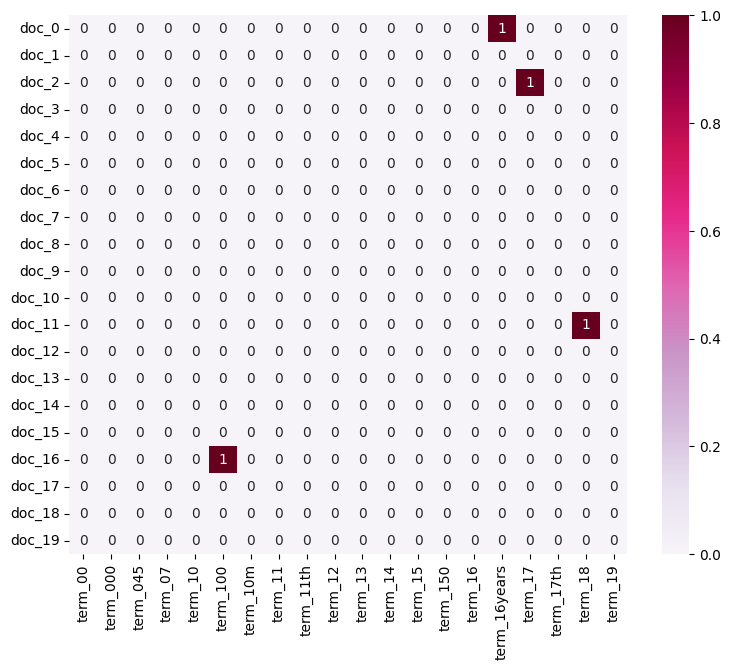

In [71]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

The above heatmap show that the matrix is very sparse, so we can modify the code to give more information.\
Choose the top 20 tokens that is most frequently used in the first 20 documents.

The top 20 token index:
 [3336 3284 2254 1733  258 2341 1651 1804 3570 3300 1833 2671 1347 2028
 2328 1646 3468 3610 3328 3045]
The top 20 token feature:
 ['to', 'the', 'my', 'in', 'and', 'of', 'his', 'it', 'was', 'this', 'jim', 'reeves', 'for', 'love', 'now', 'him', 'up', 'when', 'time', 'songs']


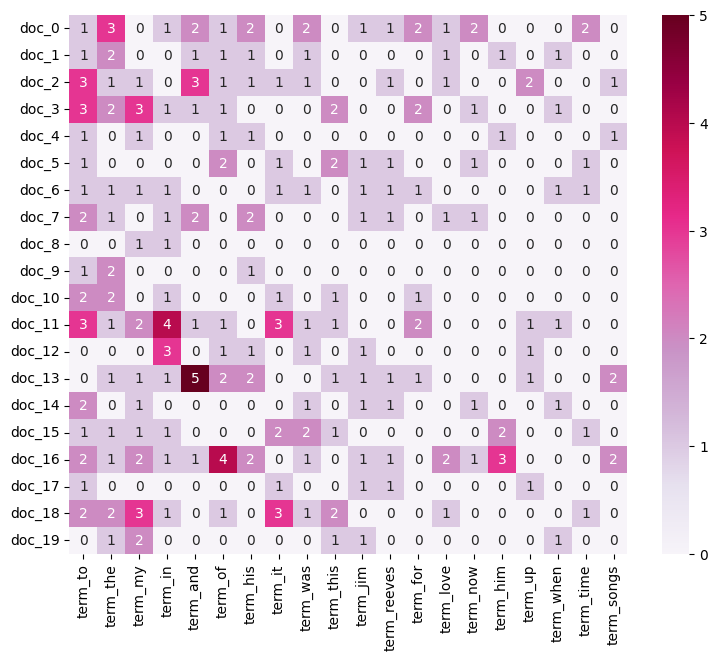

In [73]:
# 1. sum the df_counts along the axis=0
# 2. sort the sum in descending order
# 3. get the top 20 index
top_20_index = np.argsort(df_counts[0:20].toarray().sum(axis=0))[::-1][:20]
print('The top 20 token index:\n',top_20_index)

# get the top 20 token
top_20_token = [count_vect.get_feature_names_out()[i] for i in top_20_index]
print('The top 20 token feature:\n',top_20_token)

# plot it with heatmap
top_20_x = ["term_"+str(i) for i in top_20_token]
top_20_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]
top_20_z = df_counts[0:20, top_20_index].toarray()
df_todraw = pd.DataFrame(top_20_z, columns = top_20_x, index = top_20_y)
vmax_value = max(top_20_z.flatten())
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=vmax_value, annot=True)

---
### 3.4 Attribute Transformation / Aggregation